<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

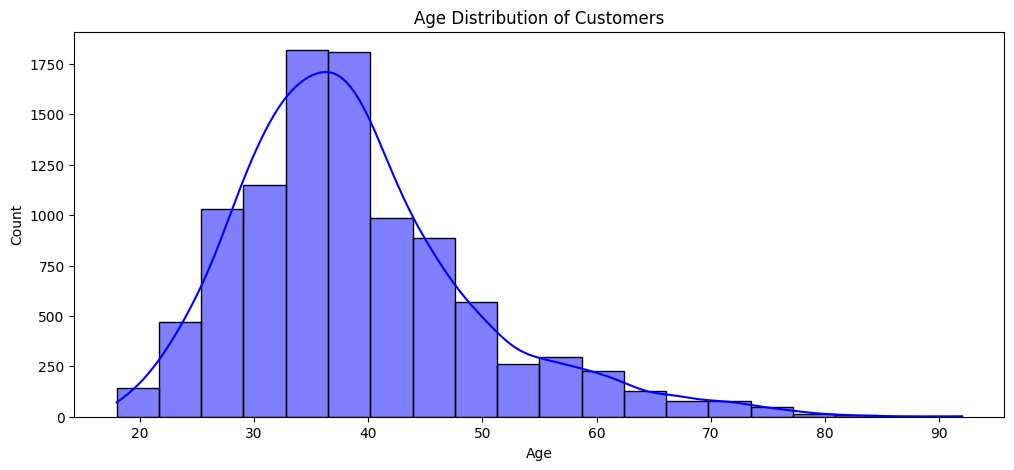

(Gender
 Male      5457
 Female    4543
 Name: count, dtype: int64,
 Geography
 France     5014
 Germany    2509
 Spain      2477
 Name: count, dtype: int64)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
file_path = "/content/Bank-Customer-Attrition-Insights-Data (1).csv"
df = pd.read_csv(file_path)
df.info(), df.head()
numerical_cols = ["Balance", "CreditScore", "Point Earned"]
summary_stats = df[numerical_cols].describe().T
summary_stats["median"] = df[numerical_cols].median()
summary_stats["skewness"] = df[numerical_cols].apply(skew)
summary_stats["kurtosis"] = df[numerical_cols].apply(kurtosis)
summary_stats
gender_dist = df["Gender"].value_counts()
geography_dist = df["Geography"].value_counts()
plt.figure(figsize=(12,5))
sns.histplot(df["Age"], bins=20, kde=True, color="blue")
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
gender_dist, geography_dist

In [12]:
active_customers = df[df["IsActiveMember"] == 1]["Point Earned"]
inactive_customers = df[df["IsActiveMember"] == 0]["Point Earned"]
active_stats = {
    "Min": active_customers.min(),
    "Max": active_customers.max(),
    "Mean": active_customers.mean()
}
inactive_stats = {
    "Min": inactive_customers.min(),
    "Max": inactive_customers.max(),
    "Mean": inactive_customers.mean()
}
active_stats, inactive_stats

({'Min': 206, 'Max': 1000, 'Mean': 605.4228305183459},
 {'Min': 119, 'Max': 1000, 'Mean': 607.6753969890699})

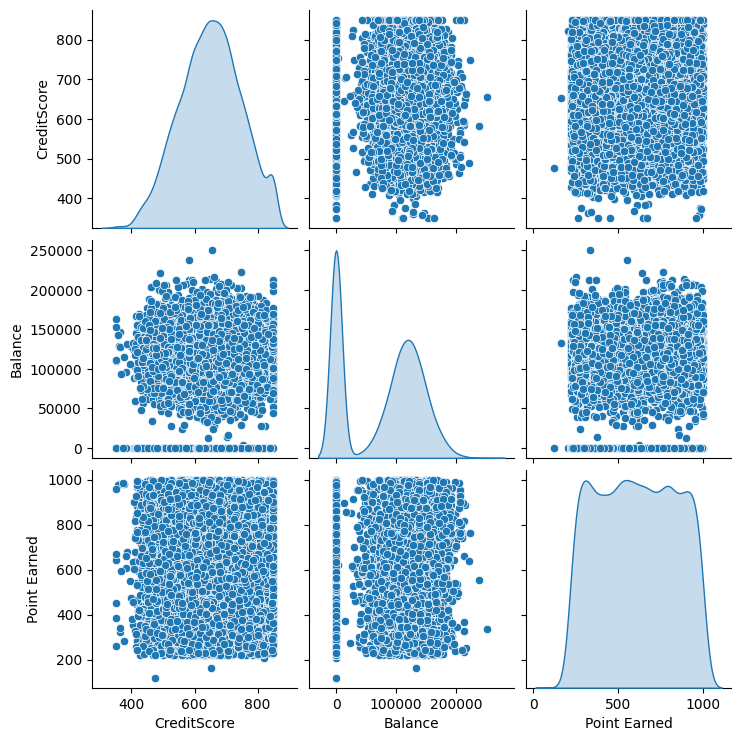

,CreditScore,Balance,Point Earned
CreditScore,1.000000,0.006268,0.000077
Balance,0.006268,1.000000,0.014608
Point Earned,0.000077,0.014608,1.000000


In [13]:
correlation_matrix = df[["CreditScore", "Balance", "Point Earned"]].corr()
sns.pairplot(df[["CreditScore", "Balance", "Point Earned"]], diag_kind='kde')
plt.show()
correlation_matrix

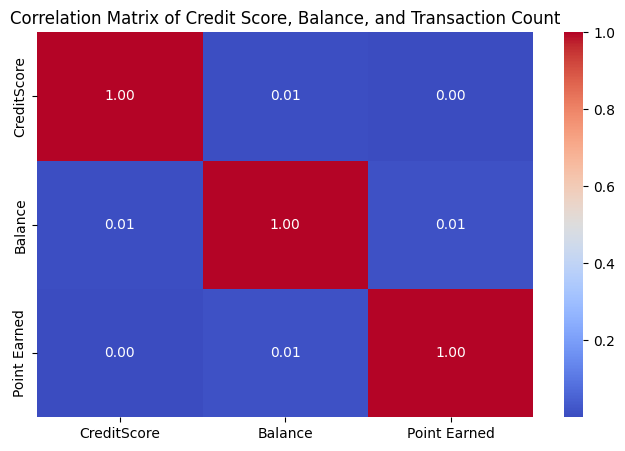

,CreditScore,Balance,Point Earned
CreditScore,1.000000,0.006268,0.000077
Balance,0.006268,1.000000,0.014608
Point Earned,0.000077,0.014608,1.000000


In [14]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Credit Score, Balance, and Transaction Count")
plt.show()
correlation_matrix

<ipython-input-15-7b1a056276f8>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["Stayed", "Churned"])
<ipython-input-15-7b1a056276f8>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(["Stayed", "Churned"])


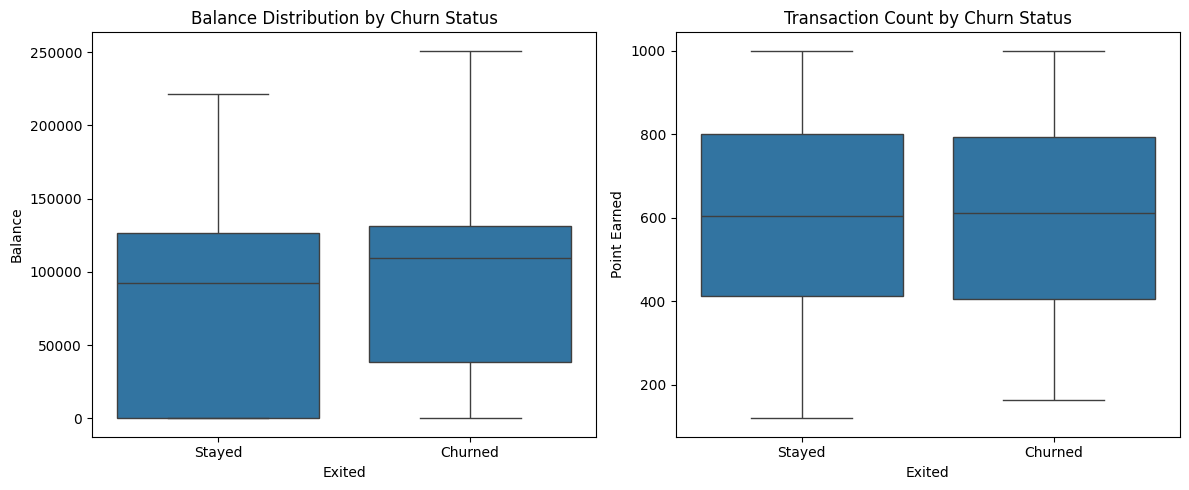

,Metric,Churned,Stayed
0,Balance Mean,91109.476006,72742.750663
1,Balance Median,109344.230000,92063.060000
2,Transaction Mean,604.448479,607.044084
3,Transaction Median,610.500000,603.000000


In [15]:
churned = df[df["Exited"] == 1]
stayed = df[df["Exited"] == 0]
churn_vs_stayed = pd.DataFrame({
    "Metric": ["Balance Mean", "Balance Median", "Transaction Mean", "Transaction Median"],
    "Churned": [churned["Balance"].mean(), churned["Balance"].median(), churned["Point Earned"].mean(), churned["Point Earned"].median()],
    "Stayed": [stayed["Balance"].mean(), stayed["Balance"].median(), stayed["Point Earned"].mean(), stayed["Point Earned"].median()]
})
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=df, x="Exited", y="Balance", ax=axes[0])
axes[0].set_title("Balance Distribution by Churn Status")
axes[0].set_xticklabels(["Stayed", "Churned"])
sns.boxplot(data=df, x="Exited", y="Point Earned", ax=axes[1])
axes[1].set_title("Transaction Count by Churn Status")
axes[1].set_xticklabels(["Stayed", "Churned"])
plt.tight_layout()
plt.show()
churn_vs_stayed

In [17]:
low_credit_threshold = df["CreditScore"].quantile(0.25)
high_balance_threshold = df["Balance"].quantile(0.75)
low_credit_high_balance = df[(df["CreditScore"] <= low_credit_threshold) & (df["Balance"] >= high_balance_threshold)].shape[0]
total_customers = df.shape[0]
probability_low_credit_high_balance = low_credit_high_balance / total_customers
probability_low_credit_high_balance

0.0638